# Гистограммы ориентированных градиентов. Histogram of Oriented Gradients (HOG)

Цель работы - научиться работать с выделением и анализом границ (контуров) изображения; применить описанные ниже методы для поиска необходимой LEGO фигурки среди заданного набора, а так же найти объект (в нашем случае глаз) на изображении

## Теория


 
<img src="img/hog.png" alt="Drawing" style="width: 600px;"/> 

### Алгоритм подсчета HOG для картинки

1) Делим изображение на "клетки" размером 8 х 8 (предпочтительнее) и в каждой клетке подсчитываем **магнитуду** и **направление** градиентов, для этого:
    - считаем Gx (градиент вдоль оси ОХ) и Gy (градиент вдоль оси ОУ) в окне
    - направление градиента считается по формуле 
    
    <img src="img/ori.png" alt="Drawing" style="width: 150px;"/> 
    
    - магнитуда считается по формуле


    <img src="img/mag.png" alt="Drawing" style="width: 150px;"/> 
    
2) Создаем гистограмму, где bins - это 9 промежутков в углах от 0 до 180 градусов. 0-20, 20-40, ... 160-180, а сами значения для построения это магнитуды градииентов.
Также нужно нормализовать гистограмму.

    <img src="img/hist1.png" alt="Drawing" style="width: 400px;"/> 
    
3) Теперь, если отобразить HOG, то в каждой клетке размером 8х8 мы увидим направления и магнитуды градиентов ( их всего будет 8)

P.S. Лучше изменять размер изображения так, чтобы оно могло разделиться на клетки без остатков. Иначе в оставшихся частях HOG считаться не будет
Попробуйте в следующем блоке кода менять параметр pixels_per_cell на 
- (8, 8) - классический HOG
- (100, 100) - тогда будет видно, что в каждой клетке рисуются все 8 направлений градиентов, но магнитуды у них будут различаться
- (400, 400) - тогда будет заметно, что в части, которую не получилось захватить кном размером (400, 400) не будет нарисован HOG
    

In [1]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


image = data.coffee()

fd, hog_image = hog(image, orientations=9, pixels_per_cell=(20, 20),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()



ModuleNotFoundError: No module named 'skimage'

In [3]:
# вспомогательная функция
def plot_transform_result(src_image, transform_image, is_gray=False):
    """
    Отрисовать с помощью plt исходное изображение и его преобразование.
    
    :param src_image: np.ndarray: исходное изображение
    :param transform_image: np.ndarray: преобразованное изображение
    :param is_gray: bool: флаг для отображения ЧБ изображений
    :return: None
    """
    fig, m_axs = plt.subplots(1, 2, figsize=(6.4*2, 4.8*2), constrained_layout=True)
    ax1, ax2 = m_axs

    cmap = 'gray' if is_gray else None
    ax1.set_title('Исходное изображение')
    ax1.imshow(src_image, cmap=cmap)
    ax1.set_xticks([]), ax1.set_yticks([])
    ax2.set_title('Результат преобразования')
    ax2.imshow(transform_image, cmap=cmap)
    ax2.set_xticks([]), ax2.set_yticks([])
    plt.show()

# Контуры на изображении

## Оператор Собеля

**Оператор Собеля** $-$ это дискретный дифференциальный оператор, вычисляющий приближение градиента яркости изображения.
Оператор вычисляет градиент яркости изображения в каждой точке. Так находится направление наибольшего увеличения яркости и величина её изменения в этом направлении. Результат показывает, насколько «резко» или «плавно» меняется яркость изображения в каждой точке, а значит, вероятность нахождения точки на грани, а также ориентацию границы.

Т.о. результатом работы оператора Собеля в точке области постоянной яркости будет нулевой вектор, а в точке, лежащей на границе областей различной яркости — вектор, пересекающий границу в направлении увеличения яркости.

Наиболее часто оператор Собеля применяется в алгоритмах выделения границ. 

Оператор Собеля основан на свёртке изображения небольшими целочисленными фильтрами в вертикальном и горизонтальном направлениях, поэтому его относительно легко вычислять. Оператор использует ядра 3x3, с которыми свёртывают исходное изображение для вычисления приближенных значений производных по горизонтали и по вертикали.

In [4]:
import os
import cv2
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

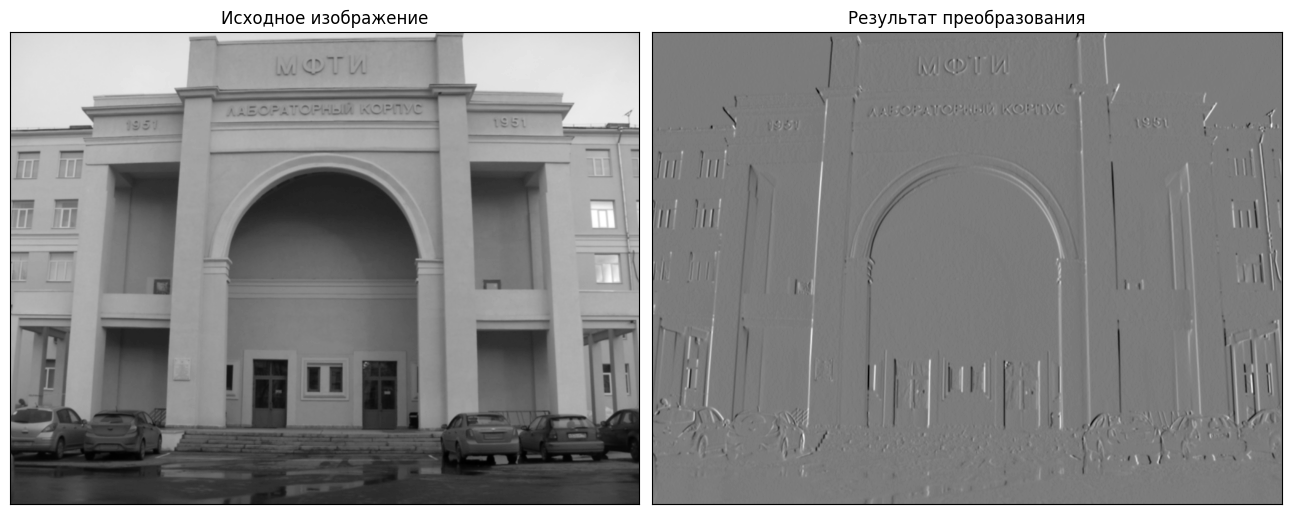

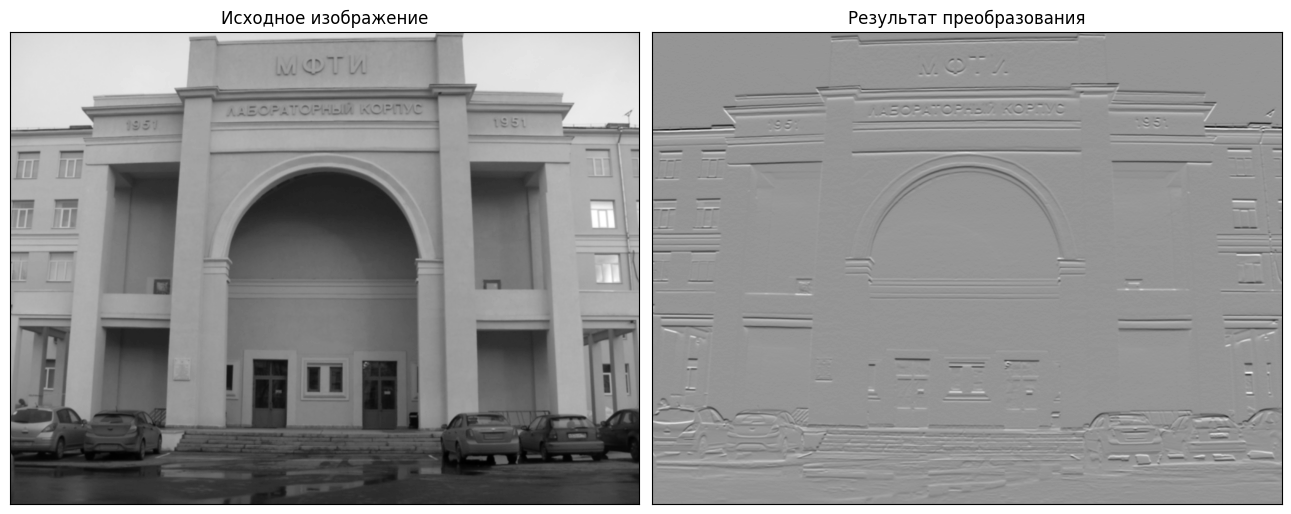

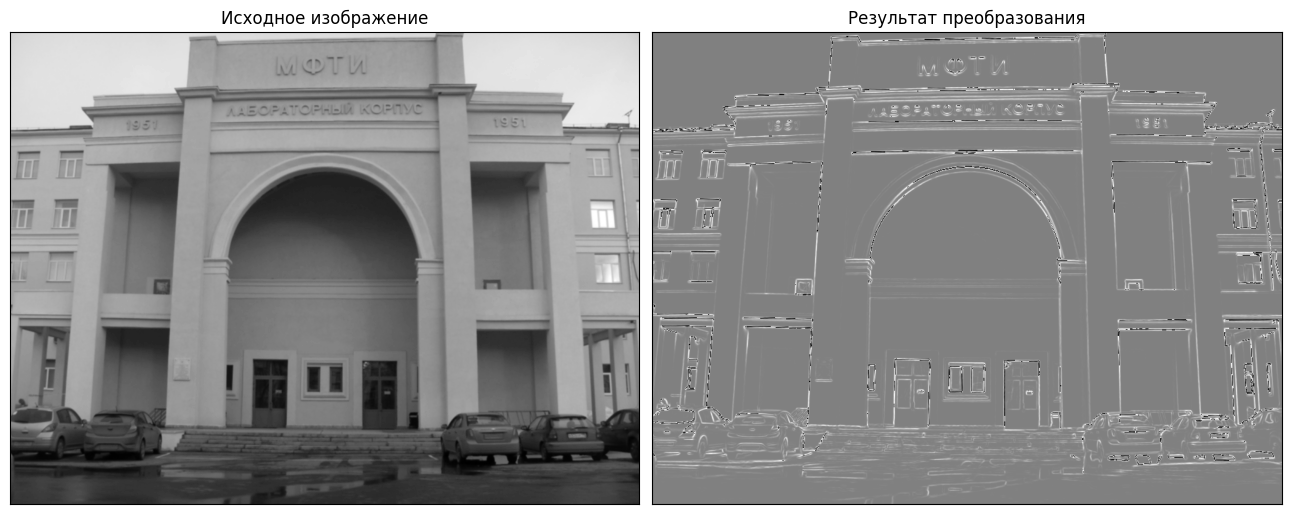

In [18]:
src = cv2.imread('img/lk.jpg')
src = cv2.GaussianBlur(src, (3, 3), 0)
    
scale = 1
delta = 0
ddepth = cv2.CV_16S
    
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)


grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
# Gradient-Y
# grad_y = cv.Scharr(gray,ddepth,0,1)
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

plot_transform_result(gray, grad_x, is_gray=True)
plot_transform_result(gray, grad_y, is_gray=True)
plot_transform_result(gray, grad_y ** 2 + grad_x ** 2, is_gray=True)

## Контур и как его найти

**Контурный анализ** $-$ это один из важных и очень полезных методов описания, хранения, распознавания, сравнения и поиска графических образов/объектов. 

**Контур** $-$ это внешние очертания (обвод) предмета/объекта.

При проведении контурного анализа:
* полагается, что контур содержит достаточную информацию о форме объекта;
* внутренние точки объекта во внимание не принимаются. 

Вышеприведённые положения, разумеется, накладывают существенные ограничения на область применения контурного анализа, которые, в основном, связаны с проблемами выделения контура на изображениях:
* из-за одинаковой яркости с фоном объект может не иметь чёткой границы, или может быть зашумлён помехами, что приводит к невозможности выделения контура;
* перекрытие объектов или их группировка приводит к тому, что контур выделяется неправильно и не соответствует границе объекта.

Однако, переход к рассмотрению только контуров объектов позволяет уйти от пространства изображения – к пространству контуров, что существенно снижает сложность алгоритмов и вычислений. 

Т.о., контурный анализ имеет довольно слабую устойчивость к помехам, и любое пересечение или лишь частичная видимость объекта приводит либо к невозможности детектирования, либо к ложным срабатываниям, но простота и быстродействие контурного анализа, позволяют вполне успешно применять данный подход (при чётко выраженном объекте на контрастном фоне и отсутствии помех).

Итак, мы определились, что контур — это некая граница объекта, которая отделяет его от фона (других объектов). 

Во всех случаях мы получаем бинарное изображение, которое явным образом задаёт нам границы объекта. Вот эта совокупность пикселей, составляющих границу объекта и есть контур объекта.

Чтобы оперировать полученным контуром, его необходимо как-то представить (закодировать). 
Например, указывать вершины отрезков, составляющих контур.
Другой известный способ кодирования контура $-$ это **цепной код Фримена**. Этот метод будет рассмотрен чуть позже.

## Оператор Лапласа
Он вычисляет лапласиан изображения, заданного соотношением,
${\Delta src = \frac{\partial ^2{src}}{\partial x^2} + \frac{\partial ^2{src}}{\partial y^2}}$
где каждая производная находится с использованием производных Собеля. Если ksize = $3$, то для фильтрации используется следующее ядро:

$$
{K = \begin{pmatrix}
0 & \ 1 & \ 0 \\ 
1 & \ -4 & \ 1 \\ 
0 & \ 1 & \ 0 
\end{pmatrix}}$$

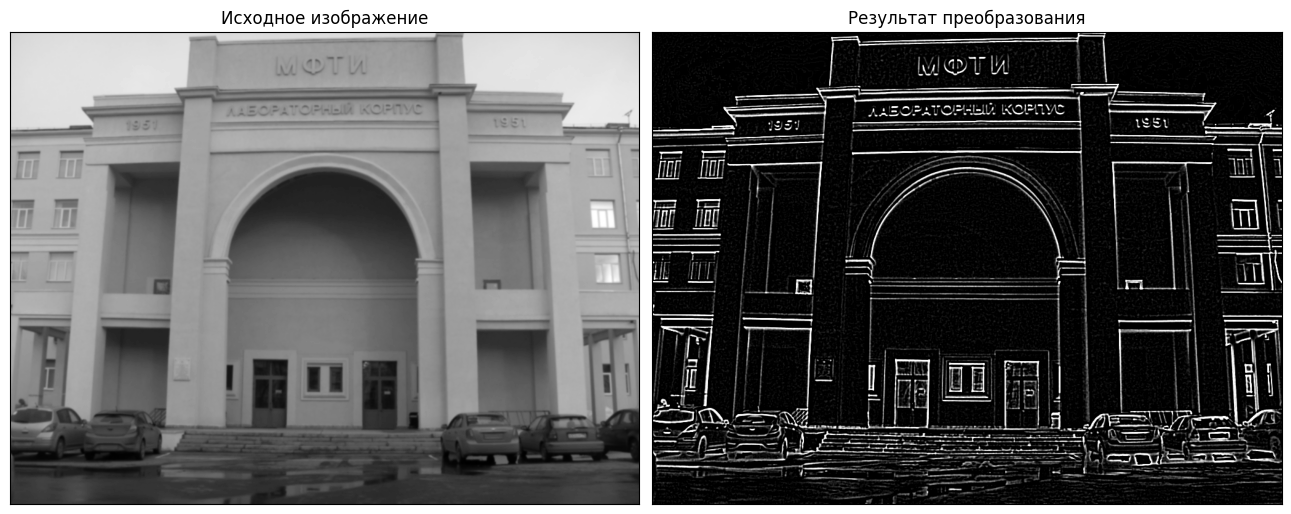

In [19]:
img = cv2.imread('img/lk.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## выделяем границы
gray_img = cv2.GaussianBlur(gray_img, ksize=(7, 7), sigmaX=1, sigmaY=1)
laplac = cv2.Laplacian(gray_img, cv2.THRESH_BINARY, scale=0.55, ksize=5)

plot_transform_result(gray_img, laplac, is_gray=True)

## Практика

# Задача №1 - Лего детальки

Имеется 2 выборки из датасета фотографий лего картинок. Структура одной выборки следующая:
```
test
| -- 'target.jpg'
| -- source
|    | -- '*.jpg'
|           ...
|    | -- '*.jpg'
```
В выборке есть опорное изображение - target.jpg и набор из 20 картинок в папке source.

Задача - написать программу, которая прочитает все изображения и определит на каких изображениях из папки source сфотографирована такая же лего деталька, что и деталь в target.jpg

Результат выполнения программы - файлик с названиями подходящих изображений.

<table><tr>
    <td> <img src="Datasets/test1/target.jpg" alt="Drawing" style="width: 400px;"/> </td>
      <td> <img src="Datasets/test2/target.jpg" alt="Drawing" style="width: 400px;"/> </td>

</tr></table>

In [20]:
# Вспомогательная ф-ия для чтения всех изображений
def read_all_image_paths(folder):
    
    folder = Path(folder)
    image_paths = [i.__str__() for i in folder.glob('*.jpg')]
    
    return image_paths

Для оценки качества результата используем метрики accuracy и recall определяемые через следующие параметры: true positive (TP), true negative (TN), false positive (FP) и false negative (FN)

In [34]:
def return_metrics(gt_path, prediction_path):
    with open(gt_path) as f:
        gt = set([i.strip('\n') for i in f.readlines() if len(i)])
    with open(prediction_path) as f:
        pred = set([i.strip('\n') for i in f.readlines() if len(i)])

    len_dataset = 20

    TP, TN, FP, FN = (0, ) * 4
    for i in pred:
        if i in gt:
            TP += 1
            gt.remove(i)
        else:
            FP += 1
    FN = len(gt)
    TN = len_dataset - TP - FP - FN

    accuracy = (TP + TN) / len_dataset
    recall = TP / (TP + FN)

    return accuracy, recall

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Для нахождения нужной фигурки будем сравнивать насколько похожи по форме два сравниваемых контура. Воспользуемся оператором Лапласа для выделения границ

### (1) Сравним контур целевого объекта с контурами объектов из БД

In [23]:
def boarder_countour(img):
    
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    blur = cv2.medianBlur(gray_img, 3)
    laplac = cv2.Laplacian(blur, cv2.THRESH_BINARY, scale=1, ksize=5)
    contours, hierarchy = cv2.findContours(laplac, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    contour = max(contours, key=cv2.contourArea)

    return contour

In [24]:
def cmp_countour(img_paths, target_img):

    target_countour = boarder_countour(target_img)

    cmp = []
    for img_path in img_paths:
        img = cv2.imread(img_path)
        countour = boarder_countour(img)

        similarity = cv2.matchShapes(countour, target_countour, cv2.CONTOURS_MATCH_I1, 0)
        
        cmp.append(similarity)

    cmp = np.array(cmp)

    return cmp

### (2) Сравним Hu-моменты целевого объекта с Hu-моментами объектов из БД

In [25]:
def boarder_hu(img):
    
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    blur = cv2.medianBlur(gray_img, 3)
    laplac = cv2.Laplacian(blur, cv2.THRESH_BINARY, scale=1, ksize=5)
    contours, hierarchy = cv2.findContours(laplac, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    cnt = contours[212]
    M = cv2.moments(cnt)
    hu = cv2.HuMoments(M)
    
    return hu

In [26]:
def cmp_hu(img_paths, target_img):
    
    target_hu = boarder_hu(target_img)

    loss = []
    for img_path in img_paths:
        img = cv2.imread(img_path)
        hu = boarder_hu(img)
        
        difference = np.square(hu - target_hu).mean()
        loss.append(difference)

    loss = np.array(loss)

    return loss

### Воспользуемся комбинацией этих двух методов для увеличения точности оценки. Необходимо перемасштабировать параметры, чтобы они были одного порядка

In [29]:
def find_best_figures(img_paths, target_img):
    
    alpha = 1
    beta = 10**4

    cmp_countours = cmp_countour(img_paths, target_img)
    cmp_hus = cmp_hu(img_paths, target_img)

    combine_metric = alpha * cmp_countours + beta * cmp_hus

    sorted_indices = sorted(range(len(combine_metric)), key=lambda i: combine_metric[i], reverse=True)
    min_indices = sorted_indices[:4]
    img_paths = np.array(img_paths)

    best_list = img_paths[min_indices]

    return best_list

In [30]:
for test in ['test1', 'test2']:
    
    target_img = cv2.imread(f'Datasets/{test}/target.jpg')
    images_folder = Path(os.path.abspath('')) / 'Datasets' / test / 'source'
    img_paths = read_all_image_paths(images_folder)

    best_list = find_best_figures(img_paths, target_img)

    with open(f'{test}.txt', 'w') as f:
        for path_elem in best_list:
            path_elem = path_elem.split('/')
            f.write(path_elem[-1])
            f.write('\n')

In [35]:
for test in ['test1', 'test2']:
    
    print(f'Metrics for {test}:')
    
    gt_test = Path(os.path.abspath('')) / 'Datasets' / 'gt' / f'{test}.txt'
    pred = Path(os.path.abspath('')) / f'{test}.txt'

    accuracy, recall = return_metrics(gt_test, pred)

    print(f'Acc: {accuracy:.2f}')
    print(f'Recall: {recall:.2f}')
    print()

Metrics for test1:
Acc: 0.80
Recall: 0.50

Metrics for test2:
Acc: 0.80
Recall: 0.50



# Задача №2 - Найдем шаблон на изображении с помощью HOG и кросс-корреляции

Задача - написать программу, которая сможет найти шаблон одного глаза на нескольких изображениях, в том числе затемненных. Для этого используется HOG представление изображений, поиск шаблона сделан с помощью кросс-корреляции 


<table><tr>
    <td> <img src="hog/eye.png" alt="Drawing" style="width: 400px;"/> 
</tr></table>     

<table><tr>
    <td> <img src="hog/eyes.jpg" alt="Drawing" style="width: 400px;"/> </td>
      <td> <img src="hog/eyes_dark.jpg" alt="Drawing" style="width: 400px;"/> </td>
      <td> <img src="hog/woman.jpg" alt="Drawing" style="width: 200px;"/> </td>

</tr></table>

In [9]:
from skimage.feature import hog
from skimage import data, exposure


def calc_hog(image):
    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(20, 20),
                        cells_per_block=(1, 1), visualize=True, channel_axis=-1)

    hog_template = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    plt.imshow(hog_template, cmap=plt.cm.gray)

    return hog_template

ModuleNotFoundError: No module named 'skimage'

In [6]:
from scipy.signal import correlate2d

def find_template(image, template):

    hog_template = calc_hog(template)
    hog_image = calc_hog(image)

    hog_template = hog_template.squeeze()
    hog_image = hog_image.squeeze()

    hog_template = (hog_template - hog_template.mean()) / hog_template.std()
    hog_image = (hog_image - hog_image.mean()) / hog_image.std()

    correlation = correlate2d(hog_image, hog_template, mode='valid')

    y, x = np.unravel_index(np.argmax(correlation), correlation.shape)

    return x, y

In [7]:
def draw_result(template, x, y):

    result_image = image
    cv2.rectangle(result_image, (x, y), (x + template.shape[1], y + template.shape[0]), (0, 255, 0), 2)

    plt.imshow(result_image)

In [2]:
def img_handler(img_path, tmplt_path):
    
    image = cv2.imread(img_path)
    template = cv2.imread(tmplt_path)

    x, y = find_template(image, template)

    draw_result(template, x, y)

In [8]:
dir_name = 'hog/'
img_name_1 = 'eyes.jpg'
img_name_2 = 'eyes_dark.jpg'
img_name_3 = 'woman.jpg'
tmplt_name = 'eye.png'

img_handler(dir_name + img_name_1, dir_name + tmplt_name)
img_handler(dir_name + img_name_2, dir_name + tmplt_name)
img_handler(dir_name + img_name_3, dir_name + tmplt_name)

NameError: name 'calc_hog' is not defined